In [4]:
import alpaca_trade_api as alpaca
import config
from alpaca_trade_api import REST
from alpaca_trade_api import TimeFrame
import datetime
import pandas
import matplotlib.pyplot as plt
import itertools
import time
import json
import scipy.stats as stats
import math
import os

current_dir = os.getcwd()
target_path = os.path.join(current_dir, "../keys/apikeys.json")

with open(target_path, 'r') as json_file:
    data = json.load(json_file)
alpacapublickey = data["alpaca-public-key"]
alpacasecretkey = data["alpaca-private-key"] 

In [6]:
# API Info for fetching data, portfolio, etc. from Alpaca
BASE_URL = "https://paper-api.alpaca.markets"
ALPACA_API_KEY = alpacapublickey
ALPACA_SECRET_KEY = alpacasecretkey

# Instantiate REST API Connection
api = alpaca.REST(key_id=ALPACA_API_KEY, secret_key=ALPACA_SECRET_KEY, base_url=BASE_URL, api_version='v2')

In [7]:
#Fetch Account
account = api.get_account()# Print Account Detailsprint(account.id, account.equity, account.status)
print(account)

Account({   'account_blocked': False,
    'account_number': 'PA3XCSU7V9FG',
    'accrued_fees': '0',
    'admin_configurations': {},
    'balance_asof': '2023-08-29',
    'bod_dtbp': '0',
    'buying_power': '199887.72',
    'cash': '99876.33',
    'created_at': '2023-06-07T03:27:47.510267Z',
    'crypto_status': 'ACTIVE',
    'crypto_tier': 1,
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '0',
    'effective_buying_power': '199887.72',
    'equity': '100011.39',
    'id': '600eb10d-6abf-4070-acea-f73ab95d90ca',
    'initial_margin': '67.53',
    'last_equity': '100011.24',
    'last_maintenance_margin': '40.47',
    'long_market_value': '135.06',
    'maintenance_margin': '40.52',
    'multiplier': '2',
    'non_marginable_buying_power': '99876.33',
    'pattern_day_trader': False,
    'pending_transfer_in': '0',
    'portfolio_value': '100011.39',
    'position_market_value': '135.06',
    'regt_buying_power': '199887.72',
    'short_market_value': '0

In [8]:
x=datetime.date(2023,5,7)
y=datetime.date(2023,6,7)
PYPL_DATA = api.get_bars(['PYPL',"AAPL"],'17Minute',start=x,end=y,limit=1000000)
print(PYPL_DATA)

[Bar({   'S': 'AAPL',
    'c': 173.29,
    'h': 173.57,
    'l': 173.1,
    'n': 420,
    'o': 173.1,
    't': '2023-05-08T07:58:00Z',
    'v': 18786,
    'vw': 173.407553}), Bar({   'S': 'AAPL',
    'c': 173.35,
    'h': 173.35,
    'l': 173.28,
    'n': 90,
    'o': 173.35,
    't': '2023-05-08T08:15:00Z',
    'v': 4048,
    'vw': 173.316954}), Bar({   'S': 'AAPL',
    'c': 173.34,
    'h': 173.35,
    'l': 173.32,
    'n': 46,
    'o': 173.35,
    't': '2023-05-08T08:32:00Z',
    'v': 1454,
    'vw': 173.337118}), Bar({   'S': 'AAPL',
    'c': 173.38,
    'h': 173.43,
    'l': 173.33,
    'n': 177,
    'o': 173.4,
    't': '2023-05-08T08:49:00Z',
    'v': 8068,
    'vw': 173.383249}), Bar({   'S': 'AAPL',
    'c': 173.3,
    'h': 173.39,
    'l': 173.3,
    'n': 61,
    'o': 173.39,
    't': '2023-05-08T09:06:00Z',
    'v': 1995,
    'vw': 173.352145}), Bar({   'S': 'AAPL',
    'c': 173.37,
    'h': 173.37,
    'l': 173.3,
    'n': 79,
    'o': 173.32,
    't': '2023-05-08T09:23:00Z

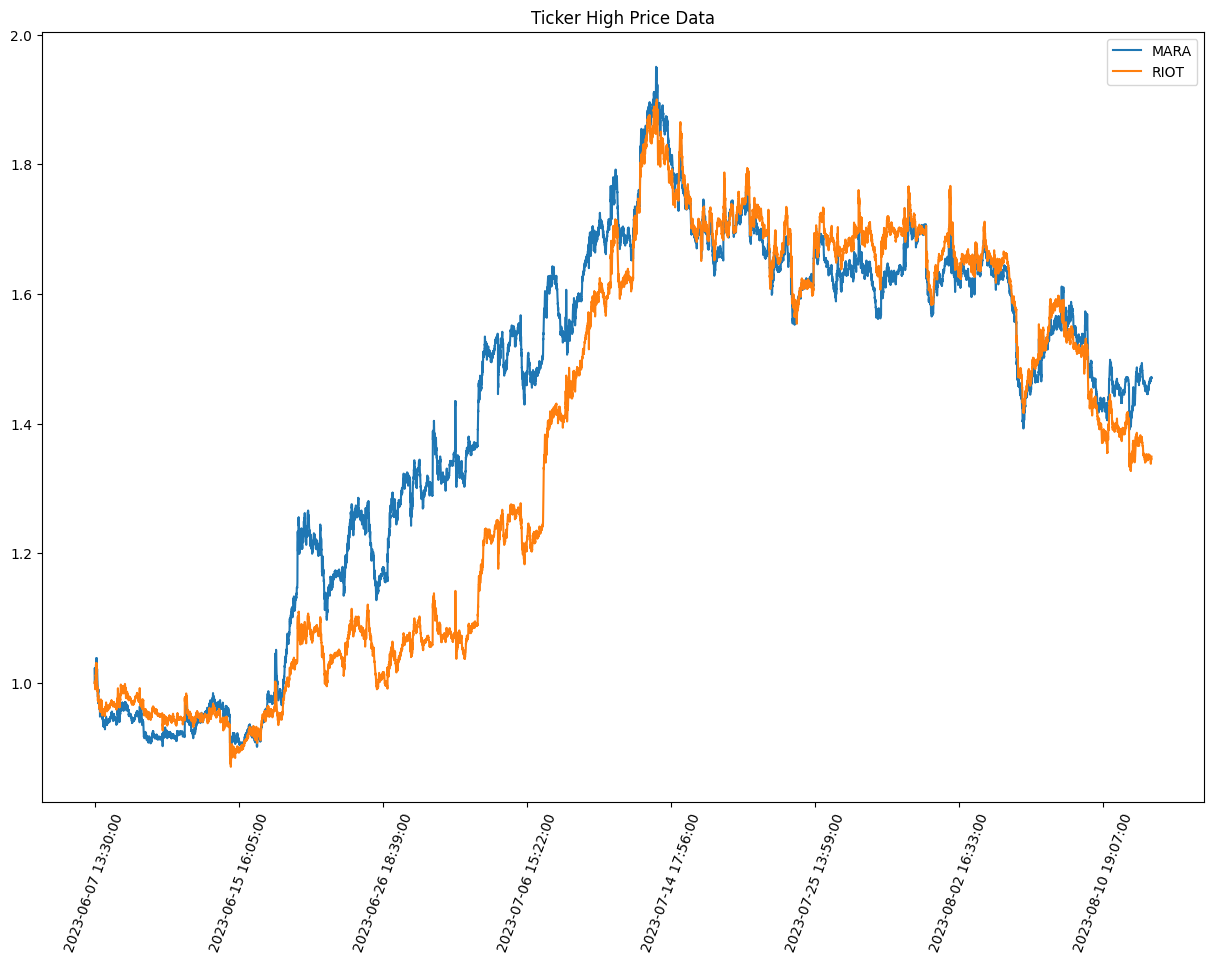

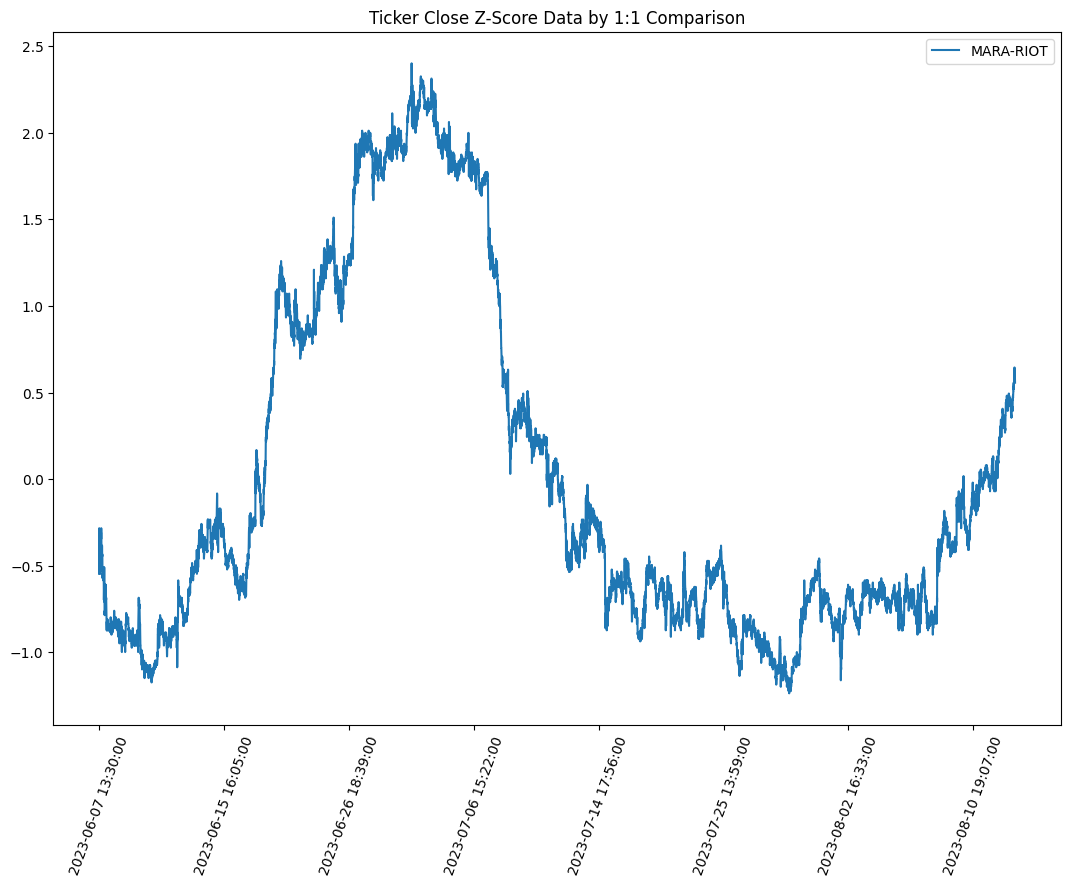

In [10]:
def convertDate(date):
    return datetime.datetime(int(date[0:4]),int(date[5:7]),int(date[8:10]),int(date[11:13]),int(date[14:16]),int(date[17:19]))

def getValidTimes(start,end,interval,intervalamt,prehours = True,afterhours = True):
    if start.time() < datetime.time(8,0,0):
        print("you entered an impoper start time to get stock data")
        return -1
    if prehours == True:
        sttime = datetime.time(8,0,0)
    else:
        sttime = datetime.time(13,30,0)
    #print(sttime)
    if afterhours == True:
        etime = datetime.time(23,59,0)
    else:
        etime = datetime.time(20,0,0)
    if start.time() < sttime:
        start = datetime.datetime(start.year,start.month,start.day,sttime.hour,sttime.minute,0)
    elif start.time() > etime:
        start+=datetime.timedelta(days=1)
        start = datetime.datetime(start.year,start.month,start.day,sttime.hour,sttime.minute,0)
    #print(etime)
    lst = []
    while(start.time() <= etime and start.time() >= sttime and start <= end):
        lst += [start]
        if interval.lower() == "minute":
            start+=datetime.timedelta(minutes = intervalamt)
        elif interval.lower() == "hour":
            start+=datetime.timedelta(hours = intervalamt)
        elif interval.lower() == "day":
            start+=datetime.timedelta(days = intervalamt)
        elif interval.lower() == "week":
            start+=datetime.timedelta(weeks = intervalamt)
        elif interval.lower() == "month":
            start+=datetime.timedelta(months = intervalamt)
        else:
            print("you entered an improper interval")
            return -1
        if start.time() < sttime:
            start = datetime.datetime(start.year,start.month,start.day,sttime.hour,sttime.minute,0)
        elif start.time() > etime:
            start+=datetime.timedelta(days=1)
            start = datetime.datetime(start.year,start.month,start.day,sttime.hour,sttime.minute,0)
    #print(lst)
    return lst

def getData(tickerlist,interval,intervalamt,start,end="same day",info="close",prehours = True,afterhours = True):
    if end == "same day":
        if afterhours == True: 
            end = datetime.datetime(start.year,start.month,start.day,23,59,0)
        else:
            end = datetime.datetime(start.year,start.month,start.day,20,0,0)
    #create empty time framework
    data = {}
    DATA = api.get_bars(tickerlist,str(intervalamt)+interval.capitalize(),start=start.date(),end=end.date(),limit=1000000000)._raw
    times = getValidTimes(start,end,interval,intervalamt,prehours,afterhours)
    if times == -1:
        print("Get times function failed")
    for tm in times:
        index = len(tickerlist)
        data[tm] = []
        data[tm].extend([*range(-1, -index-1, -1)])
    for DATUM in DATA:
        if convertDate(DATUM["t"]) in times:
            tic = tickerlist.index(DATUM["S"])
            if info == "close":
                data[convertDate(DATUM["t"])][tic] = DATUM["c"]
            if info == "high":
                data[convertDate(DATUM["t"])][tic] = DATUM["h"]
            if info == "low":
                data[convertDate(DATUM["t"])][tic] = DATUM["l"]
            if info == "open":
                data[convertDate(DATUM["t"])][tic] = DATUM["o"]
    #fix not full data points
    #print(list(data.items()))
    for tm in times:
        for x in range(len(tickerlist)):
            if data[tm][x] == -x-1:
                #print("if occured")
                try:
                    if tm.time() != datetime.time(8,0,0) and tm.time() != datetime.time(13,30,0):
                        data[tm][x] = data[prevtime][(x//4)*4+3]
                    elif (tm.time() == datetime.time(8,0,0) and tm.time() and sttime == datettime.time(8,0,0)) or (tm.time() == datetime.time(13,30,0) and tm.time() and sttime == datettime.time(13,30,0)):
                        data[tm][x] = data[datetime.datetime(tm.year,tm.month,tm.day,sttime.hour,sttime.minute)][x]
                        "The start wasn't there"
                    else:
                        del data[tm]
                        break
                except:
                    del data[tm]
                    break
        prevtime = tm
    return data
    
def printData(data,tickerlist,equalized = True,info="close",samegraph = False):
    sdata = []
    frst = list(data.values())[0]
    if equalized == True:
        for x in range(len(tickerlist)):
            sd = [val[x]/frst[x] for val in list(data.values())]
            sdata+=[sd]
        if samegraph == False:
            for x in range(len(tickerlist)):
                data_dict={}
                data_dict[tickerlist[x]] = sdata[x]
                fig, ax = plt.subplots(1, figsize=(16,9))
                df = pandas.DataFrame(data_dict,index=[str(val) for val in list(data.keys())])
                lines = df.plot.line(
                    ax=ax,
                    title="Ticker " + info.capitalize() + " Price Data",
                    figsize=(15, 10),
                    legend=True 
                )
                ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
        else:
            data_dict={}
            for x in range(len(tickerlist)):
                data_dict[tickerlist[x]] = sdata[x]
            fig, ax = plt.subplots(1, figsize=(16,9))
            df = pandas.DataFrame(data_dict,index=[str(val) for val in list(data.keys())])
            lines = df.plot.line(
                ax=ax,
                title="Ticker " + info.capitalize() + " Price Data",
                figsize=(15, 10),
                legend=True 
            )
            ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
    else:
        for x in range(len(tickerlist)):
            sd = [val[x] for val in list(data.values())]
            sdata+=[sd]
        if samegraph == False:
            for x in range(len(tickerlist)):
                data_dict={}
                data_dict[tickerlist[x]] = sdata[x]
                fig, ax = plt.subplots(1, figsize=(16,9))
                df = pandas.DataFrame(data_dict,index=[str(val) for val in list(data.keys())])
                lines = df.plot.line(
                    ax=ax,
                    title="Ticker " + info.capitalize() + " Price Data",
                    figsize=(15, 10),
                    legend=True 
                )
                ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
        else:
            data_dict={}
            for x in range(len(tickerlist)):
                data_dict[tickerlist[x]] = sdata[x]
            fig, ax = plt.subplots(1, figsize=(16,9))
            df = pandas.DataFrame(data_dict,index=[str(val) for val in list(data.keys())])
            lines = df.plot.line(
                ax=ax,
                title="Ticker " + info.capitalize() + " Price Data",
                figsize=(15, 10),
                legend=True 
            )
            ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
        
def getSpread(data,tickerlist,period):
    #calculate x length period moving average
    #define init length data
    avg_lists = [list(data.values())[x] for x in list(range(0,period))]
    #print(avg_lists)
    spread = []
    for x in range(0,len(data.values())):
        rd = []
        for y in range(len(tickerlist)-1):
            for z in range(y+1,len(tickerlist)):
                rd+=[round(list(data.values())[x][y]*period/sum([avg[y] for avg in avg_lists]) - list(data.values())[x][z]*period/sum([avg[y] for avg in avg_lists]),3)]
        spread+=[rd]
        #change the last period values
        changee = x % period
        if x >= period:
            avg_lists[changee] = list(data.values())[x]
    return spread

def calculateIndices(length):
    first = []
    second = []
    for x in range(length):
        for y in range(length-x-1):
            first+=[x]
    for x in range(1,length):
        for y in range(x,length):
            second+=[y]
    return list(zip(first,second))

def comparePairs(data,tickerlist,period,info="close",graphit = False):
    spr = getSpread(data,tickerlist,period)
    zscores = []
    for x in range(len(list(range(0,int(len(tickerlist)*(len(tickerlist)-1)/2))))):
        zscore = list(stats.zscore([val[x] for val in spr]))
        zscores+=[zscore]
    #print(zscores)
    if graphit == True:
        data_dict = {}
        indices = calculateIndices(len(tickerlist))
        for x in range(len(zscores)):
            string = tickerlist[indices[x][0]]+"-"+tickerlist[indices[x][1]]
            #print(string)
            data_dict[string] = zscores[x]
        fig, ax = plt.subplots(1)
        df = pandas.DataFrame(data_dict,index=[str(val) for val in list(data.keys())])
        lines = df.plot.line(
            ax=ax,
            title="Ticker " + info.capitalize() + " Z-Score Data by 1:1 Comparison",
            figsize=(13, 9),
            legend=True 
        )
        ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
    return zscores    

tickerlist = ["MARA","RIOT"]
d = getData(tickerlist,"minute",1,datetime.datetime(2023,6,7,8,0,0),datetime.datetime(2023,8,14,20,0,0),info="high",prehours = False,afterhours = False)
#print(d)
printData(d,tickerlist,equalized=True,info="high",samegraph = True)
#printData(d,["AAPL","AMD","NVDA"],info="high",samegraph = False)
#getSpread(d,["V","SQ","PYPL","AAPL"],15)
z = comparePairs(d,tickerlist,10,graphit=True)

2022-06-07
2023-06-07


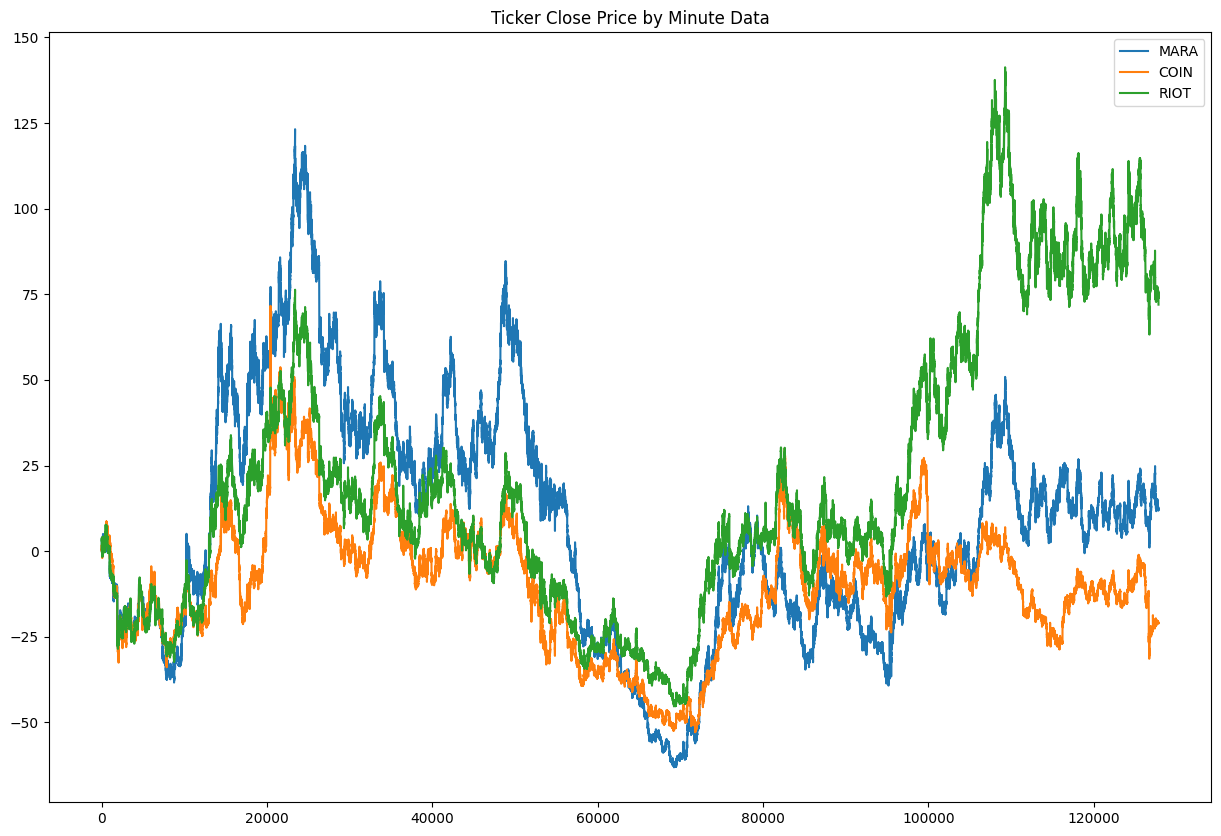

In [22]:
def compareStocks(list_stocks):
    x=datetime.date(2022,6,7)
    print(x)
    y=datetime.date(2023,6,7)
    print(y)
    slist=[]
    for stock in list_stocks: #create the list of close prices  
        STOCK_DATA = api.get_bars(stock,'1Minute',start=x,end=y,limit=1000000)
         
        STOCK_data={}
        STOCK_first_price = float(str(STOCK_DATA[0]).split()[2][:-1])
        for data in STOCK_DATA:
            STOCK_data[str(data).split()[12][1:-2]]=[float(str(data).split()[2][:-1])/STOCK_first_price*100-100]
        slist+=[STOCK_data]
        
    
    to_del_times = []
    for x in range(len(slist)):
        for tm in slist[x].keys():
            for x in range(len(slist)):
                if tm not in slist[x].keys():
                    to_del_times += [tm]
        for inst in to_del_times:
            for x in range(len(slist)):
                try:
                    del slist[x][inst]
                except: 
                    pass
    data_dict={}
    for x in range(len(slist)):
        slist[x] = list(slist[x].values())
        slist[x] = list(itertools.chain.from_iterable(slist[x]))
        data_dict[list_stocks[x]] = slist[x]
    
    fig, ax = plt.subplots(1, figsize=(16,9))
    df = pandas.DataFrame(data_dict)
    lines = df.plot.line(
        ax=ax,
        title="Ticker Close Price by Minute Data",
        figsize=(15, 10),
        legend=True
    )
        
        
compareStocks(["MARA","COIN","RIOT"])

In [24]:
def dtFormat(date):
    return str(date.date()) + "T" + str(date.time()) + "Z"

def FindPrice(ticker,date,eod=False,bod=False):
    #newd = date
    if bod == True:
        date = datetime.datetime(date.year,date.month,date.day,9,30)
    if eod == True:
        date = datetime.datetime(date.year,date.month,date.day,16,0)
    STOCK_DATA = api.get_bars(ticker,'1Minute',start=date.date(),end=date.date(),limit=1000000)
    for data in STOCK_DATA:
        if str(data).split()[12][1:-2] == dtFormat(date):
            return float(str(data).split()[2][:-1])

#defining Account class
class Account:
    def __init__(self,number,name,date):
        self.balance = 100000
        self.number = number
        self.name = name
        self.positions = {}
        self.totalassets = 100000
        self.creationdate = date
        self.date = date
    def buyStock(self,ticker,amt,date):
        #first, verify they have the money to afford this stock
        try:
            if self.balance < amt*FindPrice(ticker,date):
                print("You can't make this purchase due to insufficient funds.")
            else:
                if ticker not in self.positions:
                    self.positions[ticker] = amt
                else:
                    self.positions[ticker] += amt
                self.balance -= amt*FindPrice(ticker,date)
                self.balance = round(self.balance,2)
        except:
            print("An error occured finding the price for",ticker,"on",str(date),". This was most likely because the stock market was closed at this time.")
    def sellStock(self,ticker,amt,date):
        #first verify they have the stock to sell
        if ticker in list(self.positions.keys()):
            if self.positions[ticker] > amt:
                #sale occurs
                self.positions[ticker] -= amt
                self.balance += amt*FindPrice(ticker,date)
                self.balance = round(self.balance,2)
            elif self.positions[ticker] == amt:
                #sale occurs and sells all stock
                del self.positions[ticker]
                self.balance += amt*FindPrice(ticker,date)
                self.balance = round(self.balance,2)
            else: 
                print("You can't make this sale, you don't have sufficient stock to sell.")
        else:
            print("You can't make this sale, you don't have sufficient stock to sell.")
    def defineTotalAssets(self,date):
        balance = self.balance
        for x in range(len(list(self.positions.items()))):
            balance += list(self.positions.items())[x][1] * FindPrice(list(self.positions.items())[x][0],date)
        self.totalassets = balance
    def defineAssetsWInput(self,date,info_dict):
        balance = self.balance
        for x in range(len(list(self.positions.items()))):
            balance += list(self.positions.items())[x][1] * info_dict[list(self.positions.keys())[x]][date]
        self.totalassets = balance
    def __str__(self):
        datestr = str(self.creationdate.hour) + ":" + str(self.creationdate.minute) + " on " + str(self.creationdate.month) + "/" + str(self.creationdate.day) + "/" + str(self.creationdate.year)
        output_format="Account #{}, owned by {}, has a liquid balance of ${} and a total asset balance of ${}\nAccount creation date was {}\nThe account's holdings are: "
        start = output_format.format(self.number,self.name,"%.2f" % self.balance,"%.2f" % self.totalassets,datestr)
        if len(self.positions) != 0:
            end = str(list(self.positions.items()))
            return start + end
        else: 
            return start

STOCK BOUGHT 2020-04-09 19:30:00
An error occured finding the price for MARA on 2020-04-10 18:30:00 . This was most likely because the stock market was closed at this time.
STOCK BOUGHT 2020-04-10 19:00:00
STOCK BOUGHT 2020-12-31 19:00:00
STOCK SOLD 2021-01-29 17:00:00
STOCK BOUGHT 2021-01-29 18:00:00
STOCK BOUGHT 2022-05-10 19:00:00
STOCK SOLD 2023-05-31 19:00:00
STOCK SOLD 2023-05-31 20:00:00
You can't make this sale, you don't have sufficient stock to sell.
STOCK SOLD 2023-06-01 14:00:00
STOCK BOUGHT 2023-06-07 15:00:00
Account #1000001, owned by Luke, has a liquid balance of $115194.62 and a total asset balance of $944121.76
Account creation date was 18:30 on 4/9/2020
The account's holdings are: [('RIOT', 60000), ('GME', 1), ('AMD', 150), ('COIN', 100), ('AAPL', 400)]


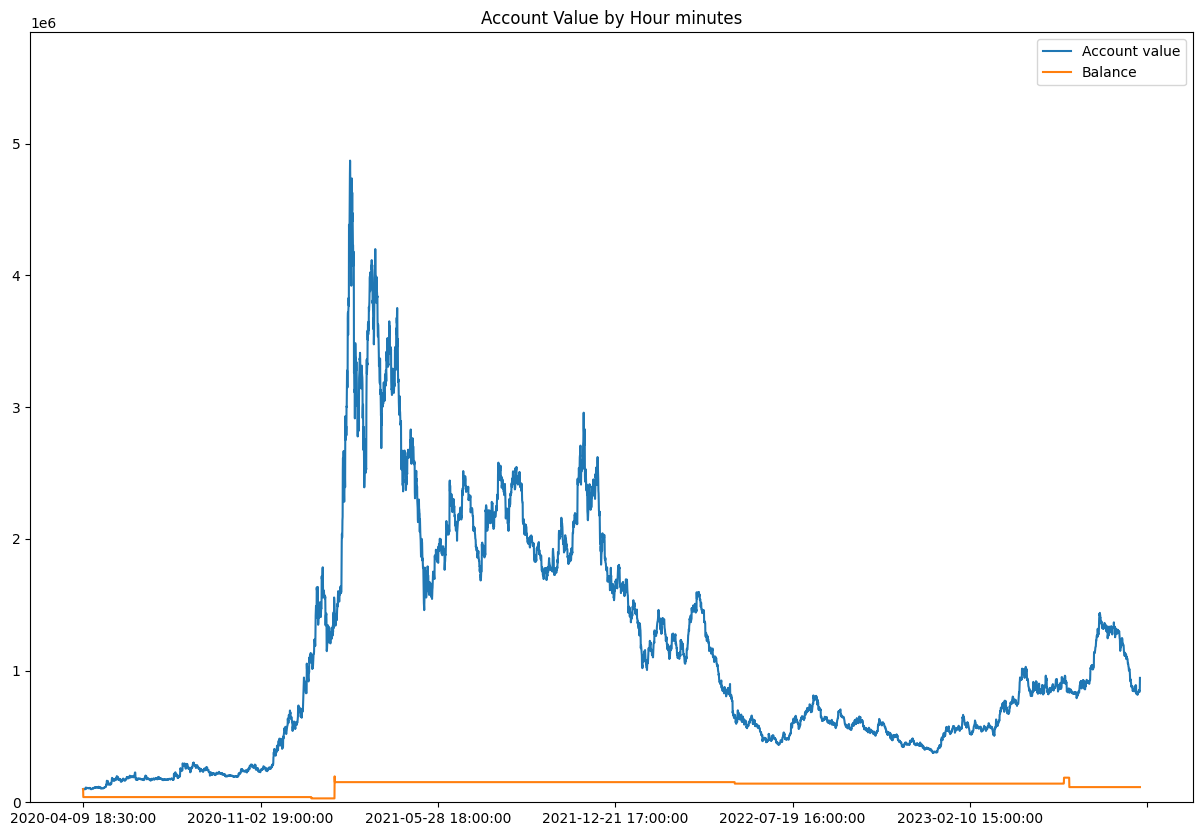

In [25]:
def accountOverTime(account,interval,intervalamt,transactions,graphit = False):
    val_data = []
    val2_data=[]
    tm_data = []
    transactions.sort(key = lambda trans:trans[3])
    #sort tr_times
    std = account.creationdate
    lsd = datetime.datetime.today() - datetime.timedelta(days=1)
    #accumulate all necessary data
    new_tr = []
    for tup in transactions:
        if tup[1] not in new_tr: 
            new_tr+=[tup[1]]
    stock_info={}
    for newt in new_tr:
        ticker_dict = {}
        ticker_info = api.get_bars(newt,str(intervalamt)+interval,start=std.date(),end=lsd.date(),limit=1000000)
        for t in ticker_info:
            date = datetime.datetime(int(str(t).split()[12][1:5]),int(str(t).split()[12][6:8]),int(str(t).split()[12][9:11]),int(str(t).split()[12][12:14]),int(str(t).split()[12][15:17]))
            ticker_dict[date] = float(str(t).split()[2][:-1])
        stock_info[newt] = ticker_dict
    #print(stock_info)
    while (std < lsd):
        if std.time() >= datetime.time(21,0,0):
            std = datetime.datetime(std.year,std.month,std.day,14,0,0) + datetime.timedelta(days=1)
        elif (std.time() >= datetime.time(0,0,0)) & (std.time() <= datetime.time(14,0,0)):
            std = datetime.datetime(std.year,std.month,std.day,14,0,0)
        if len(transactions) != 0:
            if transactions[0][3] < std:
                if transactions[0][0] == "BUY": 
                    account.buyStock(transactions[0][1],transactions[0][2],transactions[0][3])
                    print("STOCK BOUGHT",std)
                    del transactions[0]
                elif transactions[0][0] == "SELL":
                    account.sellStock(transactions[0][1],transactions[0][2],transactions[0][3])
                    del transactions[0]
                    print("STOCK SOLD",std)
        try:
            #print(std,account)
            account.defineAssetsWInput(std,stock_info)
            val_data+=[account.totalassets]
            val2_data+=[account.balance]
            tm_data+=[str(std)]
        except: 
            pass
        if interval == "Minute":
            std += datetime.timedelta(minutes = intervalamt)
        elif interval == "Hour":
            std += datetime.timedelta(hours = intervalamt)
        elif interval == "Day":
            std += datetime.timedelta(days = intervalamt)
        elif interval == "Week":
            std += datetime.timedelta(weeks = intervalamt)
        elif interval == "Month":
            std += datetime.timedelta(months = intervalamt)
    val_dict = {"Account value":val_data,"Balance":val2_data}
    if graphit == True:
        fig, ax = plt.subplots(1, figsize=(16,9))
        plt.ylim((0,1.2*max(val_data)))
        df = pandas.DataFrame(val_dict,index=tm_data)
        lines = df.plot.line(
            ax=ax,
            title="Account Value by "+str(interval)+" minutes",
            figsize=(15, 10),
            legend=True
        )
    return stock_info
        
            
    
d = datetime.datetime(2020,4,9,18,30)
d15 = datetime.datetime(2020,12,31,18,0)
d18 = datetime.datetime(2021,1,29,16,0)
d2 = datetime.datetime(2022,5,10,18,30)
d3 = datetime.datetime(2023,5,31,18,30)
act = Account(1000001,"Luke",d)
transactions = [("SELL","COIN",50,d3),("BUY","GME",500,d15),("SELL","GME",499,d18),("SELL","AMD",350,d3),("BUY","AMD",500,d18),("BUY","COIN",150,d2),("SELL","MARA",6000,d3),("BUY","MARA",7000,d+datetime.timedelta(days=1)),("BUY","RIOT",60000,d),("BUY","AAPL",400,datetime.datetime(2023,6,7,14,45))]
si=accountOverTime(act,"Hour",1,transactions,True)
print(act)

In [12]:
print(act)


date = datetime.datetime(2021,5,10,20)
act.defineAssetsWInput(date,si)
print(act)

Account #1000001, owned by Luke, has a liquid balance of $175794.62 and a total asset balance of $273154.51
Account creation date was 18:30 on 5/9/2020
The account's holdings are: [('GME', 1), ('AMD', 150), ('COIN', 100), ('AAPL', 400)]
Account #1000001, owned by Luke, has a liquid balance of $175794.62 and a total asset balance of $266642.12
Account creation date was 18:30 on 5/9/2020
The account's holdings are: [('GME', 1), ('AMD', 150), ('COIN', 100), ('AAPL', 400)]


In [ ]:
act = Account(1,"Luke",date)
print(act)
date = datetime.datetime(2023,1,3,12,11)
datetwo = datetime.datetime(2023,1,4,12,11)
currentDate = datetime.datetime(2023,6,8,12,11)
act.buyStock("AMD",300,date)
act.sellStock("AMD",200,datetwo)
act.defineTotalAssets(currentDate)
print(act)

In [ ]:
dateone = datetime.datetime(2023,6,5,1,11,0)
print(type(dateone))
datetwo = datetime.datetime(2023,6,6,1,11,0)
print(type(datetwo))
print(datetwo<dateone)
datethree = datetime.datetime(2023,6,6,23,59)
datethree = datethree + datetime.timedelta(minutes = 1)
print(datetime.time(0,0,0))

In [14]:
time.sleep(0.2)